In [30]:
# --------------------------------
# Name: plot_lengthscales_error.ipynb
# Author: Brian R. Greene
# University of Oklahoma
# Created: 13 April 2021
# Purpose: read output from integral_lengthscale.py to plot
# Updates 
# 26 April 2021 -- read from new A_interp sims (only 128 is ready)
# --------------------------------

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [32]:
# Configure plots
rc('font',weight='normal',size=20,family='serif',serif='Computer Modern Roman')
rc('text',usetex='True')

In [217]:
# load npz files
fdir = "/home/bgreene/Python/LES/scripts/SBL/"
# loop over resolutions
# resolutions = ["096", "128", "160", "192", "256"]
resolutions = ["128", "160", "192"]
z = {}
u_len = {}
w_len = {}
theta_len = {}
for res in resolutions:
    dat = np.load(f"{fdir}lengthscales_A_{res}.npz")
    z[res] = dat["z"]
    u_len[res] = dat["u_len"]
    w_len[res] = dat["w_len"]
    theta_len[res] = dat["theta_len"]

In [218]:
# load stats files
# stats = np.genfromtxt("/home/bgreene/simulations/C_spinup/output/average_statistics.csv",
#                       delimiter=",", skip_header=1)
# stats = np.genfromtxt("/home/bgreene/simulations/C_128_interp/output/average_statistics.csv",
#                       delimiter=",", skip_header=1)
u_ts = {}
w_ts = {}
theta_ts = {}
e_u = {}
e_theta = {}
h = {}
for i, res in enumerate(resolutions):
#     if i == 0:
#         fstats = "/home/bgreene/simulations/C_spinup/output/average_statistics_v2.csv"
#     else:
#         fstats = f"/home/bgreene/simulations/C_{res}_interp/output/average_statistics_v2.csv"
    fstats = f"/home/bgreene/simulations/A_{res}_interp/output/average_statistics.csv"

    stats = np.genfromtxt(fstats, delimiter=",", skip_header=1)
    ubar = stats[:,1]
    uvar = stats[:,12]

    # TODO: need to rotate these coordinates to be consistent with npz data
    # might need to do so in calc_stats.f90 :(

    thetabar = stats[:,4]
    thetavar = stats[:,18]

    # calculate timescales from Taylor's hypothesis
    u_ts[res] = u_len[res]/ubar
    w_ts[res] = w_len[res]/ubar
    theta_ts[res] = theta_len[res]/ubar

    # averaging timescale
    T = 3. # sec

    # calculate error
    e_u[res] = ((2.*u_ts[res]*uvar)/(ubar*ubar*T)) ** 0.5
    e_theta[res] = ((2.*theta_ts[res]*thetavar)/(thetabar*thetabar*T)) ** 0.5
    
    # calculate sbl depth h
    # depends on u* profile -> load uw_cov_tot and vw_cov_tot
    ustar = ((stats[:,7]**2.) + (stats[:,9]**2.)) ** 0.25
    ih = np.where(ustar <= 0.05*ustar[0])[0][0]
    h[res] = z[res][ih] / 0.95

In [35]:
u_len

{'128': array([ 5.0769178 ,  7.10465318,  8.38746054,  9.8003044 , 10.96208428,
        11.98728188, 12.88790862, 13.6288799 , 14.40318381, 15.16324742,
        15.88647979, 16.54162454, 17.17159539, 17.71793856, 18.31506986,
        18.6965024 , 19.01962397, 19.33603232, 19.71378064, 19.94724775,
        20.31789063, 20.65908434, 21.09512047, 21.36004839, 21.77205739,
        22.28023387, 22.65099859, 23.18951536, 23.7701916 , 24.32266371,
        24.50393566, 24.46114986, 23.93848723, 23.15846583, 22.02530817,
        20.9222427 , 20.20110022, 19.45003387, 19.06458824, 18.81862341,
        18.46351194, 18.06611913, 17.0474079 , 16.05044986, 14.89700899,
        13.74344314, 12.6234483 , 11.76532649, 11.33139767, 11.34413858,
        11.70447225, 12.62125497, 15.00908564, 18.95075016, 24.02902861,
        30.49989449, 37.14315548, 43.504143  , 48.96387498, 52.95937018,
        55.22817764, 56.43868517, 57.47752125, 57.68172876, 57.63786721,
        57.78860047, 58.20222471, 59.0634054

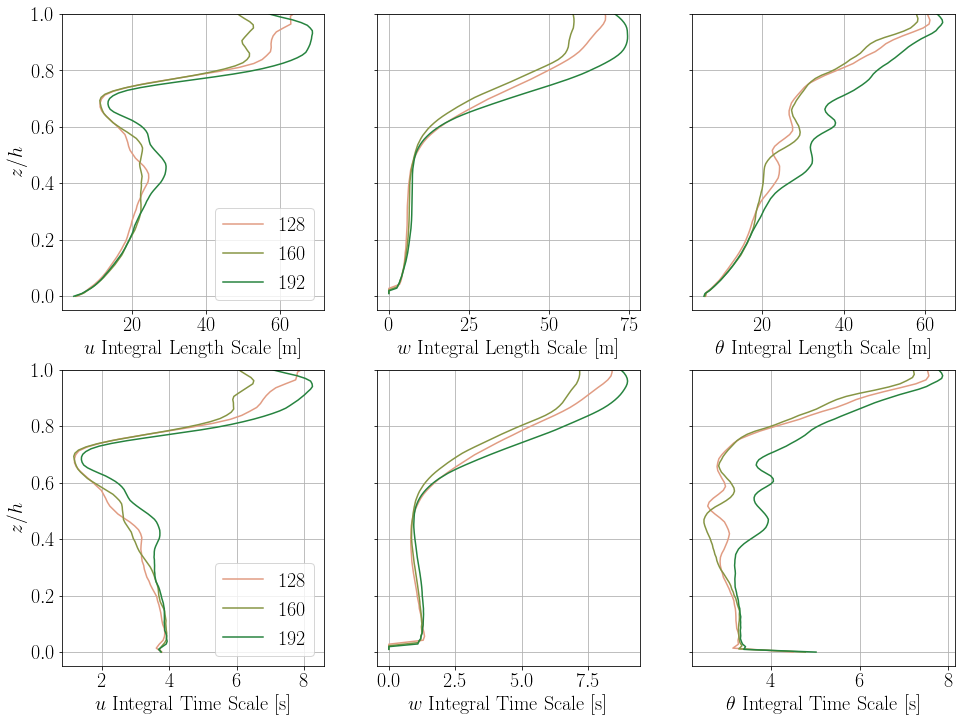

In [219]:
#### define color RGB tuples
colors = [(225./255, 156./255, 131./255),
          (134./255, 149./255, 68./255), (38./255, 131./255, 63./255),
          (0., 85./255, 80./255), (20./255, 33./255, 61./255), (252./255, 193./255, 219./255)]
# create figure and axes handles
fig1, ax1 = plt.subplots(nrows=2,ncols=3, sharey=True, figsize=(16, 12))
# loop through resolutions
for i, res in enumerate(resolutions):
    # row 1: length scales
    # u length scale
    ax1[0,0].plot(u_len[res], z[res]/h[res], color=colors[i], linestyle="-", label=res)
    # w length scale
    ax1[0,1].plot(w_len[res], z[res]/h[res], color=colors[i], linestyle="-", label=res)
    # theta length scale
    ax1[0,2].plot(theta_len[res], z[res]/h[res], color=colors[i], linestyle="-", label=res)
    # row 2: time scales
    # u length scale
    ax1[1,0].plot(u_ts[res], z[res]/h[res], color=colors[i], linestyle="-", label=res)
    # w length scale
    ax1[1,1].plot(w_ts[res], z[res]/h[res], color=colors[i], linestyle="-", label=res)
    # theta length scale
    ax1[1,2].plot(theta_ts[res], z[res]/h[res], color=colors[i], linestyle="-", label=res)
    
# format figures
# u length scale
ax1[0,0].set_xlabel("$u$ Integral Length Scale [m]")
ax1[0,0].set_ylabel("$z/h$")
ax1[0,0].grid()
ax1[0,0].legend()
ax1[0,0].set_ylim([-0.05, 1.])
# w length scale
ax1[0,1].set_xlabel("$w$ Integral Length Scale [m]")
ax1[0,1].grid()
# theta length scale
ax1[0,2].set_xlabel("$\\theta$ Integral Length Scale [m]")
ax1[0,2].grid()
# u time scale
ax1[1,0].set_xlabel("$u$ Integral Time Scale [s]")
ax1[1,0].set_ylabel("$z/h$")
ax1[1,0].grid()
ax1[1,0].legend()
# w time scale
ax1[1,1].set_xlabel("$w$ Integral Time Scale [s]")
ax1[1,1].grid()
# theta time scale
ax1[1,2].set_xlabel("$\\theta$ Integral Time Scale [s]")
ax1[1,2].grid()

# save figure
fdir_save = "/home/bgreene/Python/figures/random_errors/"
# fig1.savefig(f"{fdir_save}u_w_theta_lenthscales.pdf", format="pdf", bbox_inches="tight")

Text(0.5, 0.98, 'Relative Random Errors for Averaging Time $T = 3.0$ s')

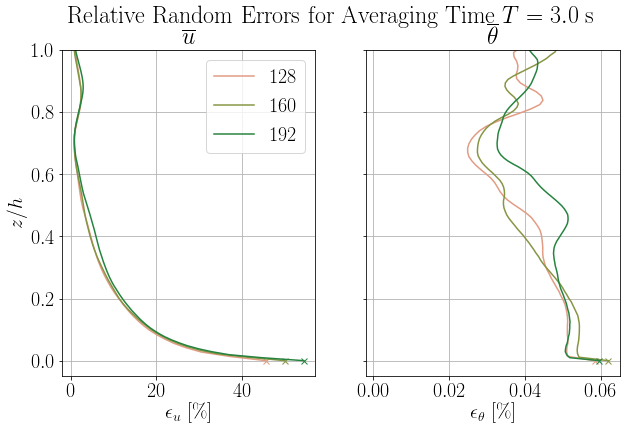

In [220]:
# plot relative random error for u and theta
fig2, ax2 = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 6))
for i, res in enumerate(resolutions):
    # u
    ax2[0].plot(100.*e_u[res], z[res]/h[res], color=colors[i], linestyle="-", label=res)
    ax2[0].plot(100.*e_u[res][0], z[res][0]/h[res], color=colors[i], linestyle="-", marker="x")
    # theta
    ax2[1].plot(100.*e_theta[res], z[res]/h[res], color=colors[i], linestyle="-", label=res)
    ax2[1].plot(100.*e_theta[res][0], z[res][0]/h[res], color=colors[i], linestyle="-", marker="x")

# format subplots
# u
ax2[0].set_xlabel("$\epsilon_u$ [\%]")
ax2[0].set_ylabel("$z/h$")
ax2[0].grid()
ax2[0].legend()
ax2[0].set_title("$\overline{u}$")
ax2[0].set_ylim([-0.05, 1.])
# theta
ax2[1].set_xlabel("$\epsilon_\\theta$ [\%]")
ax2[1].grid()
ax2[1].set_title("$\overline{\\theta}$")

fig2.suptitle(f"Relative Random Errors for Averaging Time $T = {T}$ s")

# save figure
# fig2.savefig(f"{fdir_save}u_theta_errors.pdf", format="pdf", bbox_inches="tight")

In [ ]:
thetavar

In [ ]:
dat["u_corr"]

In [ ]:
plt.plot(dat["u_corr"][:,60])
# plt.axhline(0.)

In [ ]:
40.*400./255

In [27]:
u_len

{'128': array([ 5.0769178 ,  7.10465318,  8.38746054,  9.8003044 , 10.96208428,
        11.98728188, 12.88790862, 13.6288799 , 14.40318381, 15.16324742,
        15.88647979, 16.54162454, 17.17159539, 17.71793856, 18.31506986,
        18.6965024 , 19.01962397, 19.33603232, 19.71378064, 19.94724775,
        20.31789063, 20.65908434, 21.09512047, 21.36004839, 21.77205739,
        22.28023387, 22.65099859, 23.18951536, 23.7701916 , 24.32266371,
        24.50393566, 24.46114986, 23.93848723, 23.15846583, 22.02530817,
        20.9222427 , 20.20110022, 19.45003387, 19.06458824, 18.81862341,
        18.46351194, 18.06611913, 17.0474079 , 16.05044986, 14.89700899,
        13.74344314, 12.6234483 , 11.76532649, 11.33139767, 11.34413858,
        11.70447225, 12.62125497, 15.00908564, 18.95075016, 24.02902861,
        30.49989449, 37.14315548, 43.504143  , 48.96387498, 52.95937018,
        55.22817764, 56.43868517, 57.47752125, 57.68172876, 57.63786721,
        57.78860047, 58.20222471, 59.0634054

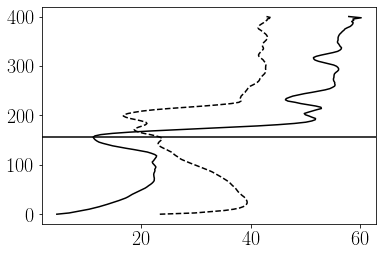

In [61]:
dd = np.load("/home/bgreene/Python/LES/scripts/SBL/filtered_lengthscale_A_160_v2.npz")    
len_u = dd["len_u"]
wspd = np.sqrt(stats[:,1]**2. + stats[:,2]**2.)
zllj = z["160"][np.argmax(wspd)]

plt.plot(u_len["160"], z["160"], "-k")
plt.plot(len_u, z["160"], "--k")
plt.axhline(zllj, c="k", ls="-")

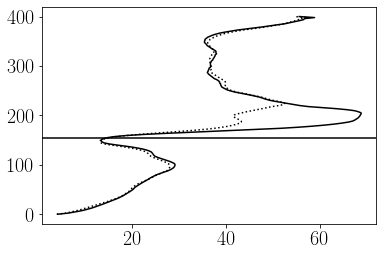

In [223]:
# dd = np.load("/home/bgreene/Python/LES/scripts/SBL/filtered_lengthscale_A_128_v2.npz")    
# len_u = dd["len_u"]
fstats = f"/home/bgreene/simulations/A_192_interp/output/average_statistics.csv"
stats = np.genfromtxt(fstats, delimiter=",", skip_header=1)
wspd = np.sqrt(stats[:,1]**2. + stats[:,2]**2.)
zllj = z["192"][np.argmax(wspd)]
dd2 = np.load("/home/bgreene/Python/LES/scripts/SBL/filtered_lengthscale_A_192.npz")
len_u_2 = dd2["len_u"]
len_theta = dd2["len_theta"]

plt.plot(u_len["192"], z["192"], "-k")
# plt.plot(len_u, z["128"], "--k")
plt.plot(len_u_2, z["192"], ":k")
plt.axhline(zllj, c="k", ls="-")

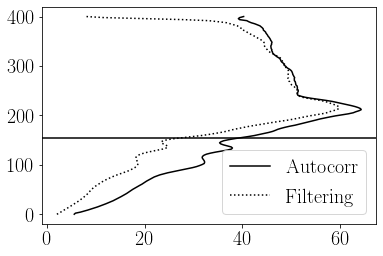

In [224]:
plt.plot(theta_len["192"], z["192"], "-k", label="Autocorr")
plt.plot(len_theta, z["192"], ":k", label="Filtering")
plt.axhline(zllj, c="k", ls="-")
plt.legend()

Text(0, 0.5, '$\\sigma_u \\ \\Delta_x^{1/2}$')

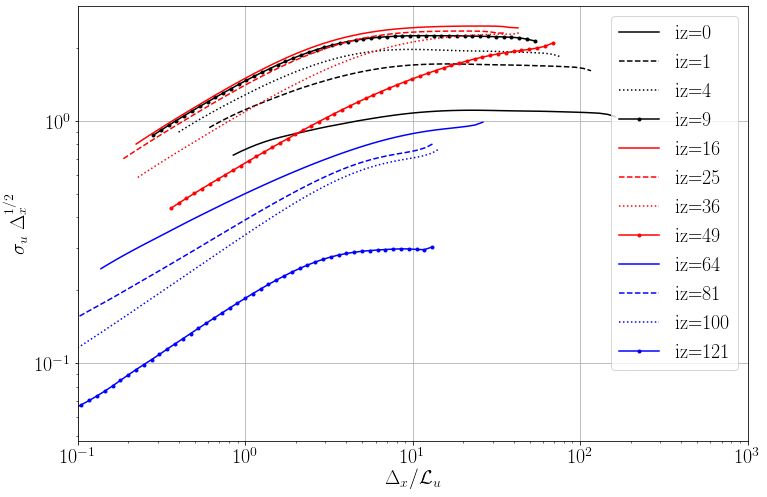

In [200]:
dd2 = np.load("/home/bgreene/Python/LES/scripts/SBL/filtered_lengthscale_A_192_full.npz")

fstr = ["-k", "--k", ":k", ".-k", "-r", "--r", ":r", ".-r", "-b", "--b", ":b", ".-b"]

fig00, ax00 = plt.subplots(1, figsize=(12, 8))
for i, j in enumerate(np.arange(12, dtype=int)**2):
    ax00.plot(dd2["delta_x"]/dd["len_u"][j], dd2["sigma_u"][j,:]*(dd2["delta_x"]**0.5), fstr[i], label=f"iz={j}")

# ax00.axvline(dd2["dx"], c="r", lw=4)
# ax00.axvline(dd2["Lx"], c="r", lw=4)
# ax00.axvline(dd2["dx"]*4, c="k", lw=4)
# ax00.axvline(dd2["Lx"]/5., c="k", lw=4)
# ax00.plot(dd2["delta_x"]/dd["len_u"][1], 0.1*dd2["delta_x"]**-0.5, linewidth=4, c="m", label="$\Delta_x^{-1/2}$")
ax00.set_xscale("log")
ax00.set_yscale("log")
ax00.set_xlim([0.1, 1000])
# ax00.set_ylim([0.005, 0.5])
ax00.legend()
ax00.grid()
ax00.set_xlabel("$\Delta_x / \mathcal{L}_u$")
ax00.set_ylabel("$\sigma_u \ \Delta_x^{1/2}$")

# ax00.annotate('$dx$', xy=(dd2["dx"], 0.008), xytext=(dd2["dx"], 0.008), rotation=270)
# ax00.annotate('$L_x$', xy=(dd2["Lx"], 0.008), xytext=(dd2["Lx"], 0.008), rotation=270)

In [165]:
dd["len_u"]

array([ 4.94234146,  6.88789223,  7.98725391,  9.35689279, 10.49517665,
       11.61717706, 12.46413517, 13.22792946, 14.08215468, 14.92207029,
       15.70339206, 16.44082938, 17.10051172, 17.69206075, 18.21386163,
       18.54780734, 18.81474287, 19.20512993, 19.63978466, 19.91844631,
       20.38298516, 20.66740181, 21.1334231 , 21.49587187, 21.93381201,
       22.42232679, 22.87924504, 23.28929433, 23.62452548, 23.93230978,
       23.87025587, 23.50090154, 22.81699517, 21.95379947, 20.71868029,
       19.38619847, 18.37889812, 17.44657581, 16.80360885, 16.233525  ,
       15.67243883, 15.14287467, 14.31937264, 13.47275692, 12.65437549,
       11.98453923, 11.49957689, 11.16561328, 11.26044323, 11.68398652,
       11.90075537, 12.0852717 , 12.67756669, 13.95245127, 15.7501089 ,
       18.40148174, 21.62839959, 25.62239238, 29.48169297, 32.57597477,
       34.17129874, 34.0362523 , 32.93747138, 31.36633882, 30.52261165,
       30.35109878, 31.27648492, 33.88478768, 38.08693158, 42.99

Text(800.0, 0.008, '$L_x$')

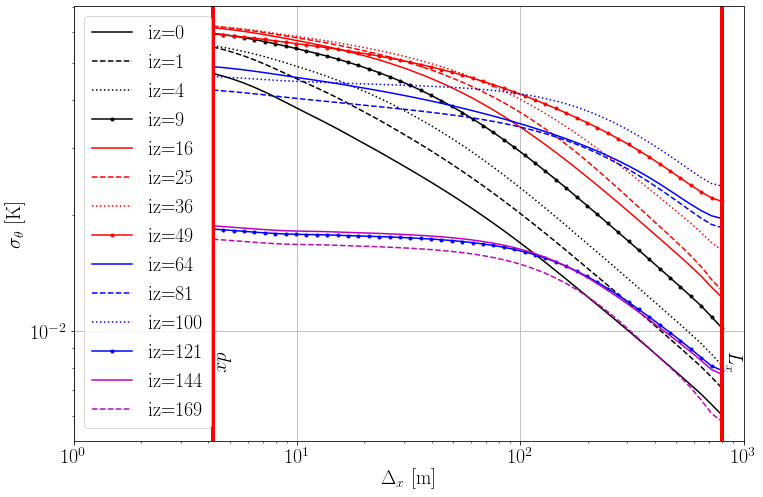

In [214]:
dd2 = np.load("/home/bgreene/Python/LES/scripts/SBL/filtered_lengthscale_A_192_full.npz")

fstr = ["-k", "--k", ":k", ".-k", "-r", "--r", ":r", ".-r", "-b", "--b", ":b", ".-b", "-m", "--m", ":m", ".-m"]

fig00, ax00 = plt.subplots(1, figsize=(12, 8))
for i, j in enumerate(np.arange(14, dtype=int)**2):
    ax00.plot(dd2["delta_x"], dd2["sigma_theta"][j,:], fstr[i], label=f"iz={j}")

ax00.axvline(dd2["dx"], c="r", lw=4)
ax00.axvline(dd2["Lx"], c="r", lw=4)
# ax00.axvline(dd2["dx"]*4, c="k", lw=4)
# ax00.axvline(dd2["Lx"]/5., c="k", lw=4)
# ax00.plot(dd2["delta_x"], dd2["delta_x"]**-0.5, linewidth=4, c="m", label="$\Delta_x^{-1/2}$")
ax00.set_xscale("log")
ax00.set_yscale("log")
ax00.set_xlim([1, 1000])
# ax00.set_ylim([0.005, 0.5])
ax00.legend()
ax00.grid()
ax00.set_xlabel("$\Delta_x$ [m]")
ax00.set_ylabel("$\sigma_{\\theta}$ [K]")

ax00.annotate('$dx$', xy=(dd2["dx"], 0.008), xytext=(dd2["dx"], 0.008), rotation=270)
ax00.annotate('$L_x$', xy=(dd2["Lx"], 0.008), xytext=(dd2["Lx"], 0.008), rotation=270)

In [205]:
i, j

(11, 121)

In [163]:
96*2

192

In [208]:
dd2["sigma_u"].shape

(192, 50)

In [198]:
96/4

24.0